In [30]:
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier


from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

In [31]:
"""
# read in data
# Pima Indians Diabetes Database
# Predict the onset of diabetes based on diagnostic measures
"""
df = pd.read_csv('./data/diabetes.csv')
print(df.shape)
df.head(3)

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [32]:
type(df)

pandas.core.frame.DataFrame

In [33]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [34]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [35]:
df['Outcome'].value_counts(dropna = False)

0    500
1    268
Name: Outcome, dtype: int64

In [36]:
df['Outcome'].value_counts(normalize = True)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

In [37]:
df['Insulin'].unique()

array([  0,  94, 168,  88, 543, 846, 175, 230,  83,  96, 235, 146, 115,
       140, 110, 245,  54, 192, 207,  70, 240,  82,  36,  23, 300, 342,
       304, 142, 128,  38, 100,  90, 270,  71, 125, 176,  48,  64, 228,
        76, 220,  40, 152,  18, 135, 495,  37,  51,  99, 145, 225,  49,
        50,  92, 325,  63, 284, 119, 204, 155, 485,  53, 114, 105, 285,
       156,  78, 130,  55,  58, 160, 210, 318,  44, 190, 280,  87, 271,
       129, 120, 478,  56,  32, 744, 370,  45, 194, 680, 402, 258, 375,
       150,  67,  57, 116, 278, 122, 545,  75,  74, 182, 360, 215, 184,
        42, 132, 148, 180, 205,  85, 231,  29,  68,  52, 255, 171,  73,
       108,  43, 167, 249, 293,  66, 465,  89, 158,  84,  72,  59,  81,
       196, 415, 275, 165, 579, 310,  61, 474, 170, 277,  60,  14,  95,
       237, 191, 328, 250, 480, 265, 193,  79,  86, 326, 188, 106,  65,
       166, 274,  77, 126, 330, 600, 185,  25,  41, 272, 321, 144,  15,
       183,  91,  46, 440, 159, 540, 200, 335, 387,  22, 291, 39

---

In [38]:
# baseine

In [39]:
df['Outcome'].mean()

0.3489583333333333

In [40]:
baseline = 1. - df['Outcome'].mean()
baseline

0.6510416666666667

---

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [43]:
# target vector and matrix 

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

<hr>

In [45]:
# KNN model 
knn = KNeighborsClassifier(n_neighbors=5)
# Standard scalor 
ss = StandardScaler()

In [46]:
# FIT
X_scaled = ss.fit_transform(X)

In [49]:
scores = cross_val_score(knn, X_scaled, y, cv = 10)
scores

array([0.64935065, 0.79220779, 0.72727273, 0.71428571, 0.71428571,
       0.75324675, 0.72727273, 0.85714286, 0.69736842, 0.75      ])

In [50]:
np.mean(scores)

0.7382433356117566

In [ ]:
---

In [51]:
k_values = list(range(1,50,2))
accs = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_scaled, y, cv=10)
    accs.append(np.mean(scores))

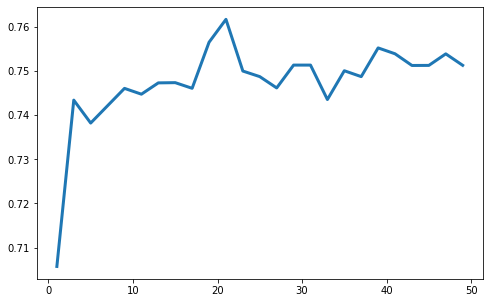

0.7617566643882434


In [52]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(k_values, accs, lw=3)
plt.show()

print(np.max(accs))